In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


In [ ]:
Flipkart_data=pd.read_csv("/content/sample_data/flipkart_com-ecommerce_sample.csv")
Flipkart_data

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7179d2f6c4ad50a17d014ca1d2815156,2015-12-01 10:15:43 +0000,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7KFJAKSTDY9G,1500.0,730.0,"[""http://img6a.flixcart.com/image/wall-decorat...",False,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,No rating available,No rating available,WallDesign,"{""product_specification""=>[{""key""=>""Number of ..."
19996,71ac419198359d37b8fe5e3fffdfee09,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE9F5URNQGJCGH,1429.0,1143.0,"[""http://img6a.flixcart.com/image/sticker/z/g/...",False,Buy Wallmantra Large Vinyl Stickers Sticker fo...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
19997,93e9d343837400ce0d7980874ece471c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE7VAYDKQZEBSD,1299.0,999.0,"[""http://img5a.flixcart.com/image/sticker/b/s/...",False,Buy Elite Collection Medium Acrylic Sticker fo...,No rating available,No rating available,Elite Collection,"{""product_specification""=>[{""key""=>""Number of ..."
19998,669e79b8fa5d9ae020841c0c97d5e935,2015-12-01 10:15:43 +0000,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,"[""Baby Care >>

In [ ]:
Flipkart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [ ]:
Flipkart_data.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')

In [ ]:
Flipkart_data['crawl_timestamp']

0        2016-03-25 22:59:23 +0000
1        2016-03-25 22:59:23 +0000
2        2016-03-25 22:59:23 +0000
3        2016-03-25 22:59:23 +0000
4        2016-03-25 22:59:23 +0000
                   ...            
19995    2015-12-01 10:15:43 +0000
19996    2015-12-01 10:15:43 +0000
19997    2015-12-01 10:15:43 +0000
19998    2015-12-01 10:15:43 +0000
19999    2015-12-01 10:15:43 +0000
Name: crawl_timestamp, Length: 20000, dtype: object

In [ ]:
#make this column into a datetime type for workability
Flipkart_data['crawl_timestamp']=pd.to_datetime(Flipkart_data['crawl_timestamp'])
Flipkart_data['crawl_timestamp']

0       2016-03-25 22:59:23+00:00
1       2016-03-25 22:59:23+00:00
2       2016-03-25 22:59:23+00:00
3       2016-03-25 22:59:23+00:00
4       2016-03-25 22:59:23+00:00
                   ...           
19995   2015-12-01 10:15:43+00:00
19996   2015-12-01 10:15:43+00:00
19997   2015-12-01 10:15:43+00:00
19998   2015-12-01 10:15:43+00:00
19999   2015-12-01 10:15:43+00:00
Name: crawl_timestamp, Length: 20000, dtype: datetime64[ns, UTC]

In [ ]:
Flipkart_data['crawl_year']=Flipkart_data['crawl_timestamp'].apply(lambda x : x.year)
Flipkart_data['crawl_year']

0        2016
1        2016
2        2016
3        2016
4        2016
         ... 
19995    2015
19996    2015
19997    2015
19998    2015
19999    2015
Name: crawl_year, Length: 20000, dtype: int64

In [ ]:
Flipkart_data['Month']=Flipkart_data['crawl_timestamp'].apply(lambda x : x.month)
Flipkart_data['Month']

0         3
1         3
2         3
3         3
4         3
         ..
19995    12
19996    12
19997    12
19998    12
19999    12
Name: Month, Length: 20000, dtype: int64

Text(0, 0.5, 'Sales')

<Figure size 10800x720 with 0 Axes>

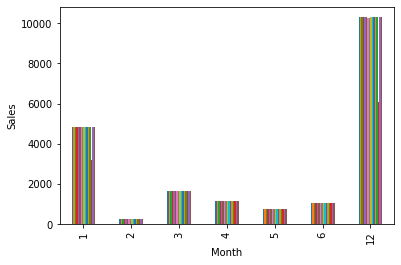

In [ ]:
# Sales by month;

plt.figure(figsize=(150,10))
temp=Flipkart_data.groupby(by='Month',axis=0).count().plot(kind='bar',legend=False)
plt.ylabel('Sales')

In [ ]:
Flipkart_data['main_category']= Flipkart_data['product_category_tree'].apply(lambda x : x.split('>>')[0][2:])

In [ ]:
Flipkart_data['main_category'].value_counts()[:10].sort_values(ascending=True)

Computers                       578
Kitchen & Dining                647
Home Furnishing                 700
Beauty and Personal Care        710
Home Decor & Festive Needs      929
Automotive                     1012
Mobiles & Accessories          1099
Footwear                       1227
Jewellery                      3531
Clothing                       6198
Name: main_category, dtype: int64

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000.]),
 <a list of 8 Text major ticklabel objects>)

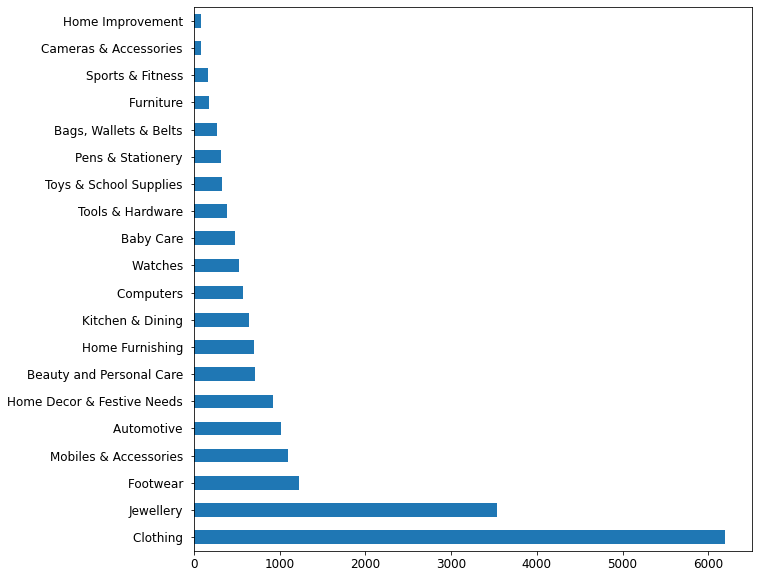

In [ ]:
#Product preferred by customers
plt.figure(figsize=(10,10))
Flipkart_data['main_category'].value_counts()[:20].sort_values(ascending=False).plot(kind='barh')
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

In [ ]:
Flipkart_data.columns

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications', 'crawl_year',
       'Month', 'main_category'],
      dtype='object')

In [ ]:
filtered_df= Flipkart_data.filter(['uniq_id','product_url','product_name','pid','retail_price','discounted_price'])

In [ ]:
filtered_df

,uniq_id,product_url,product_name,pid,retail_price,discounted_price
0,c2d766ca982eca8304150849735ffef9,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,SRTEH2FF9KEDEFGF,999.0,379.0
1,7f7036a6d550aaa89d34c77bd39a5e48,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,SBEEH3QGU7MFYJFY,32157.0,22646.0
2,f449ec65dcbc041b6ae5e6a32717d01b,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,SHOEH4GRSUBJGZXE,999.0,499.0
3,0973b37acd0c664e3de26e97e5571454,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,SRTEH2F6HUZMQ6SJ,699.0,267.0
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,PSOEH3ZYDMSYARJ5,220.0,210.0
...,...,...,...,...,...,...
19995,7179d2f6c4ad50a17d014ca1d2815156,http://www.flipkart.com/walldesign-small-vinyl...,WallDesign Small Vinyl Sticker,STIE7KFJAKSTDY9G,1500.0,730.0
19996,71ac419198359d37b8fe5e3fffdfee09,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Stickers Sticker,STIE9F5URNQGJCGH,1429.0,1143.0
19997,93e9d343837400ce0d7980874ece471c,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,STIE7VAYDKQZEBSD,1299.0,999.0
19998,669e79b8fa5d9ae020841c0c97d5e935,http://www.flipkart.com/elite-collection-mediu...,Elite Collection Medium Acrylic Sticker,STIE8YSVEPPCZ42Y,1499.0,1199.0


In [ ]:
datasetForQR=filtered_df.sample(n=10)

In [ ]:
datasetForQR

,uniq_id,product_url,product_name,pid,retail_price,discounted_price
10977,46aeaed8a44fce88fb67e003278471c9,http://www.flipkart.com/atc-blackatc-39-two-wh...,ATC BLackATC 39 Two Wheeler Cover,TWCEAXCCNPYAJUZZ,699.0,199.0
4726,3087a7157490c88f7fcb31849534aa4d,http://www.flipkart.com/vibrandz-grab-smart-ph...,Vibrandz Grab Smart Phone Holder - MLVC-04,ACCE63YUA7ZPMV33,774.0,410.0
19151,46bb01697413ac010d1892f8e3f1479d,http://www.flipkart.com/fabcart-chanderi-embro...,Fabcart Chanderi Embroidered Semi-stitched Sal...,FABEG2WVGXFDJUHQ,4199.0,839.0
11440,98f298aba857d432d1903dd82de4dce2,http://www.flipkart.com/getabhi-striped-tie/p/...,GetAbhi Striped Tie,TIEEEAKTGVCP5KCT,501.0,501.0
18963,c55bb299e013c5bff995b34dd4d422ff,http://www.flipkart.com/speedwav-216510-manual...,Speedwav 216510 Manual Rear View Mirror,VMREGG7ZZGYBZARY,1300.0,723.0
12599,d1d6e717c5cb8151a1fc16ca511c3d56,http://www.flipkart.com/miss-rich-women-s-soli...,Miss Rich Women's Solid Casual Shirt,SHTE4YFYH2VVWTBJ,799.0,399.0
18608,1de2fbe70404b330f39ce9659d720d1d,http://www.flipkart.com/neon-cotton-embroidere...,Neon Cotton Embroidered Multi-purpose Fabric,FABEGPFVBJGCF5GD,1414.0,708.0
5285,e553c577f4946348702833d3a43bf8cd,http://www.flipkart.com/allure-auto-cm-738-car...,Allure Auto CM 738 Car Mat HM Ambassador 2.0D,CRTECN2QWRACCVZW,4200.0,1380.0
15003,d0a864bdece9a03f9950457c074f30e1,http://www.flipkart.com/mintha-cotton-bath-tow...,Mintha Cotton Bath Towel,BTWDZ4SQHYMB8XEX,799.0,499.0
4894,17983ce6afb63361d48909df20f15987,http://www.flipkart.com/voylla-artificial-allo...,Voylla Artificial Alloy Necklace,NKCE9ZVGGGZXJMEP,450.0,419.0


In [ ]:
datasetForQR= datasetForQR.set_index('uniq_id')

In [ ]:
datasetForQR

,product_url,product_name,pid,retail_price,discounted_price
uniq_id,,,,,
46aeaed8a44fce88fb67e003278471c9,http://www.flipkart.com/atc-blackatc-39-two-wh...,ATC BLackATC 39 Two Wheeler Cover,TWCEAXCCNPYAJUZZ,699.0,199.0
3087a7157490c88f7fcb31849534aa4d,http://www.flipkart.com/vibrandz-grab-smart-ph...,Vibrandz Grab Smart Phone Holder - MLVC-04,ACCE63YUA7ZPMV33,774.0,410.0
46bb01697413ac010d1892f8e3f1479d,http://www.flipkart.com/fabcart-chanderi-embro...,Fabcart Chanderi Embroidered Semi-stitched Sal...,FABEG2WVGXFDJUHQ,4199.0,839.0
98f298aba857d432d1903dd82de4dce2,http://www.flipkart.com/getabhi-striped-tie/p/...,GetAbhi Striped Tie,TIEEEAKTGVCP5KCT,501.0,501.0
c55bb299e013c5bff995b34dd4d422ff,http://www.flipkart.com/speedwav-216510-manual...,Speedwav 216510 Manual Rear View Mirror,VMREGG7ZZGYBZARY,1300.0,723.0
d1d6e717c5cb8151a1fc16ca511c3d56,http://www.flipkart.com/miss-rich-women-s-soli...,Miss Rich Women's Solid Casual Shirt,SHTE4YFYH2VVWTBJ,799.0,399.0
1de2fbe70404b330f39ce9659d720d1d,http://www.flipkart.com/neon-cotton-embroidere...,Neon Cotton Embroidered Multi-purpose Fabric,FABEGPFVBJGCF5GD,1414.0,708.0
e553c577f4946348702833d3a43bf8cd,http://www.flipkart.com/allure-auto-cm-738-car...,Allure Auto CM 738 Car Mat HM Ambassador 2.0D,CRTECN2QWRACCVZW,4200.0,1380.0
d0a864bdece9a03f9950457c074f30e1,http://www.flipkart.com/mintha-cotton-bath-tow...,Mintha Cotton Bath Towel,BTWDZ4SQHYMB8XEX,799.0,499.0


In [ ]:
datasetForQR.to_csv('flipKartProducts.csv')